In [1]:
#! conda install matplotlib --y
from classo import *

import numpy as np
import matplotlib.pyplot as plt

#### To generate the data :

In [2]:
m,d,d_nonzero,k,sigma =100,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=0)

#### To define the problem :

In [3]:
problem = classo_problem(X,y)

#### solve the problem with its default parameters :

In [4]:
problem.solve()

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Stability selection
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



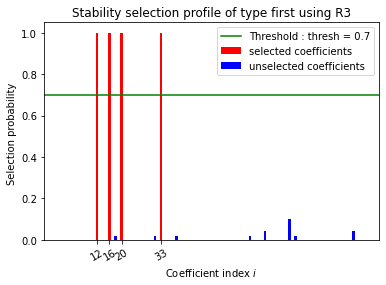

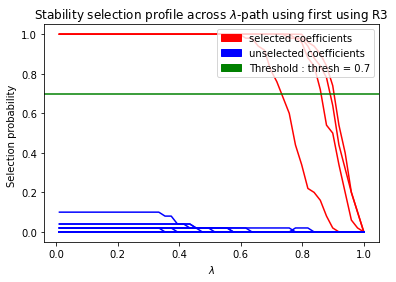

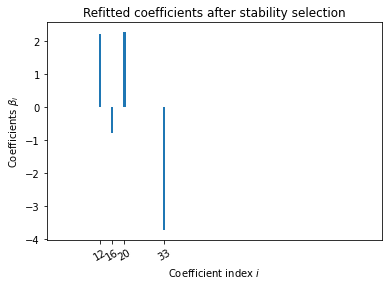


 STABILITY SELECTION : 
   Selected variables :  12    16    20    33    
   Running time :  1.464s



In [5]:
print(problem)

print(problem.solution)

#### Zarr storage

In [6]:
import zarr
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   ├── label (100,) <U2
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   ├── LAMfixedparameters
 │   ├── PATHparameters
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 │       └── formulation
 └── solution
     └── StabSel
         ├── distribution (100,) float64
         ├── distribution_path (50, 100) float64
         ├── label (100,) <U2
         ├── lambdas_path (50,) float64
         ├── refit (100,) float64
         ├── selected_param (100,) bool
         └── to_label (100,) bool

#### To plot the solutions, as graphs :

#### To solve a problem different than the default parameters :

In [36]:
m,d,d_nonzero,k,sigma =100,100,5,0,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=4)
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = False
problem.formulation.concomitant             = True

problem.model_selection.CV                  = False
problem.model_selection.LAMfixed            = True
problem.model_selection.PATH                = False
problem.model_selection.StabSel             = False
problem.model_selection.StabSelparameters.method = 'first'
problem.model_selection.CVparameters.seed = 1

problem.model_selection.LAMfixedparameters.rescaled_lam = True
problem.model_selection.LAMfixedparameters.lam = .9

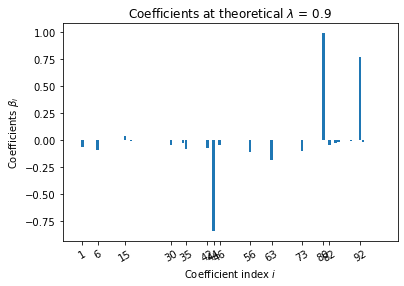


 LAMBDA FIXED : 
   Sigma  =  4.639
   Selected variables :  1    6    15    30    35    42    44    46    56    63    73    80    82    92    
   Running time :  0.399s


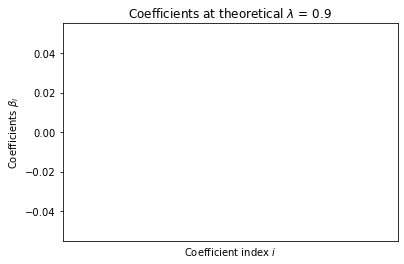


 LAMBDA FIXED : 
   Sigma  =  20.442
   Selected variables :  
   Running time :  0.005s


In [37]:
problem.model_selection.PATHparameters.numerical_method = 'DR'
problem.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem.solve()
print(problem.solution.LAMfixed)
problem.model_selection.PATHparameters.numerical_method = 'Path-Alg'
problem.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'
problem.solve()
print(problem.solution.LAMfixed)


#### To see information about the problem

In [9]:
problem

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Path
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     Npath = 40
     lamin = 0.013
     lamax = 1.0

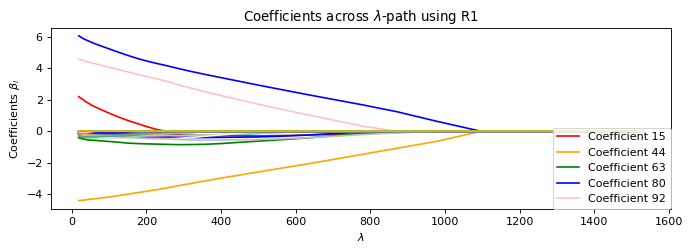


 PATH COMPUTATION : 
   Running time :  0.09s

In [10]:
problem.solution

#### To plot the solutions, as graphs :

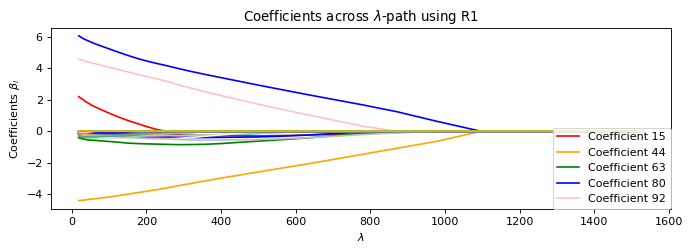


 PATH COMPUTATION : 
   Running time :  0.09s

In [11]:
problem.solution

In [12]:
root = zarr.group()
to_zarr(problem,'problem',root)
root.tree()

/
 ├── data
 │   ├── C (1, 100) float64
 │   ├── X (100, 100) float64
 │   ├── label (100,) <U2
 │   └── y (100,) float64
 ├── formulation
 ├── model_selection
 │   ├── CVparameters
 │   ├── LAMfixedparameters
 │   ├── PATHparameters
 │   │   ├── formulation
 │   │   └── lambdas (40,) float64
 │   └── StabSelparameters
 └── solution
     └── PATH
         ├── BETAS (40, 100) float64
         ├── LAMBDAS (40,) float64
         ├── formulation
         └── label (100,) <U2

In [13]:
problem.solution.CV.graphic(ratio_mse_max = 1000.)

AttributeError: 'str' object has no attribute 'graphic'

#### To show that the CV (also works for StabSel) depends only on the seed we choose :

In [ ]:
problem = classo_problem(X,y)
MS = problem.model_selection
MS.LAMfixed = False
MS.SS       = False
MS.CV       = True


MS.CVparameters.seed = 1
problem.solve()
solution1 = problem.solution.CV

MS.CVparameters.seed = 1
problem.solve()
solution2 = problem.solution.CV

MS.CVparameters.seed = 3
problem.solve()
solution3 = problem.solution.CV

b1, b2, b3 = solution1.beta, solution2.beta, solution3.beta 

print( "Difference of solution beta for same seed ", np.linalg.norm(b1-b2))

print( "Difference of solution beta for different seeds ", np.linalg.norm(b1-b3))

In [ ]:
'''
lam = 20.
e = m/2
ny = np.linalg.norm(y)
i = np.argmax(abs(sol))
problem                                     = classo_problem(X,y,C)
problem.formulation.huber                   = False
problem.formulation.concomitant             = True

problem.model_selection.CV                  = False
problem.model_selection.LAMfixed            = False
problem.model_selection.PATH                = True
problem.model_selection.StabSel             = False

problem.model_selection.LAMfixedparameters.rescaled_lam = False
problem.model_selection.LAMfixedparameters.lam = lam

problem.model_selection.PATHparameters.numerical_method = 'DR'
problem.solve()
print(problem.solution.PATH)
betas= problem.solution.PATH.BETAS
lambdas= problem.solution.PATH.LAMBDAS

problem.model_selection.LAMfixed            = True
problem.model_selection.PATH                = False

i = 20

beta1 = betas[i]
lambda1 = lambdas[i]
problem.model_selection.LAMfixedparameters.lam = lambda1
problem.solve
beta2 = problem.solution.LAMfixed.beta

for beta in [beta1,beta2,beta1-beta2]:
    plt.bar(range(len(beta)),beta)
    plt.show()
    
BETA, LAMBDA = pathlasso((X,C,y),lambdas=np.linspace(1.,1e-2,100),typ='R3',meth='DR', true_lam = False, e=m/2)








problem                                     = classo_problem(X,y,C)                           
problem.model_selection.LAMfixed            = False
problem.model_selection.PATH                = True
problem.model_selection.StabSel             = False

problem.model_selection.LAMfixedparameters.rescaled_lam = False
problem.model_selection.LAMfixedparameters.lam = 50

problem.model_selection.PATHparameters.numerical_method = 'DR'
problem.solve()
print(problem.solution.PATH)

problem.model_selection.PATHparameters.numerical_method = 'Path-Alg'
problem.solve()
print(problem.solution.PATH)

'''